In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support

from sklearn.tree import DecisionTreeRegressor


In [35]:
# main = ['Engine_id', 'Cycles']
# conditions = ['Op_Condition1', 'Op_Condition1', 'Op_Condition1']
# sensors = ['sensor_{}'.format(i) for i in range(1,22)] 
# col_names = main + conditions + sensors
train_data=pd.read_csv('S:/Sem 3/Multivariate Statistics/Assignments/HW5/train_data.csv')
test_data=pd.read_csv('S:/Sem 3/Multivariate Statistics/Assignments/HW5/test_data.csv')
y_test=pd.read_csv('S:/Sem 3/Multivariate Statistics/Assignments/HW5/RUL_forecast_length.csv')
train_data.head()

,Engine id,Cycle number,Operation Condition 1,Operation Condition 2,Operation Condition 3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:
train_data.describe()

,Engine id,Cycle number,Operation Condition 1,Operation Condition 2,Operation Condition 3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.0,9.909000e+03,9909.000000,9909.000000,9909.000000,9.909000e+03,...,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03,9909.000000,9909.0,9909.0,9909.000000,9909.000000
mean,25.144515,102.525280,0.000030,0.000003,100.0,5.186700e+02,642.671038,1590.370340,1408.653912,1.462000e+01,...,521.439767,2388.092806,8144.585275,8.441058,3.000000e-02,393.177011,2388.0,100.0,38.820832,23.292011
std,14.748925,62.324521,0.002192,0.000294,0.0,5.548198e-11,0.509467,6.187496,9.129158,2.032255e-12,...,0.750916,0.074187,20.019713,0.037858,2.886726e-15,1.568369,0.0,0.0,0.182311,0.110095
min,1.000000,1.000000,-0.008600,-0.000600,100.0,5.186700e+02,641.250000,1571.040000,1386.430000,1.462000e+01,...,518.830000,2387.880000,8102.820000,8.327900,3.000000e-02,388.000000,2388.0,100.0,38.160000,22.907100
25%,12.000000,50.000000,-0.001400,-0.000300,100.0,5.186700e+02,642.300000,1585.970000,1401.830000,1.462000e+01,...,520.970000,2388.040000,8132.790000,8.413400,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.223400
50%,25.000000,100.000000,0.000100,0.000000,100.0,5.186700e+02,642.640000,1589.950000,1407.700000,1.462000e+01,...,521.500000,2388.090000,8141.220000,8.438100,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.299700
75%,38.000000,150.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.280000,1414.470000,1.462000e+01,...,522.000000,2388.140000,8149.890000,8.465200,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.372100
max,50.000000,287.000000,0.008300,0.000600,100.0,5.186700e+02,644.530000,1614.930000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8290.250000,8.584800,3.000000e-02,399.000000,2388.0,100.0,39.430000,23.612700


In [4]:
print(train_data.groupby(train_data['Engine id']).max().describe())
print(train_data.groupby(train_data['Cycle number']).max().describe())

       Cycle number  Operation Condition 1  Operation Condition 2  \
count     50.000000              50.000000              50.000000   
mean     198.180000               0.006058               0.000496   
std       34.455348               0.000913               0.000049   
min      128.000000               0.004000               0.000400   
25%      172.250000               0.005500               0.000500   
50%      195.000000               0.005950               0.000500   
75%      214.750000               0.006700               0.000500   
max      287.000000               0.008300               0.000600   

       Operation Condition 3            T2         T24         T30  \
count                   50.0  5.000000e+01   50.000000    50.00000   
mean                   100.0  5.186700e+02  644.099000  1607.95320   
std                      0.0  5.742052e-13    0.157302     2.31992   
min                    100.0  5.186700e+02  643.870000  1604.24000   
25%                    100.0

In [5]:
def add_RUL(df):
    group_by_Eng_id = train_data.groupby('Engine id')
    max_cycle_num= group_by_Eng_id['Cycle number'].max()
    result_frame = train_data.merge(max_cycle_num.to_frame(name='max_cycle_num'), left_on='Engine id', right_index=True)
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle_num"] - result_frame["Cycle number"]
    result_frame["RUL"] = remaining_useful_life
    result_frame = result_frame.drop("max_cycle_num", axis=1)
    return result_frame
t=add_RUL(train_data)
t[['Engine id','Cycle number']+['RUL']]

,Engine id,Cycle number,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
...,...,...,...
9904,50,194,4
9905,50,195,3
9906,50,196,2
9907,50,197,1


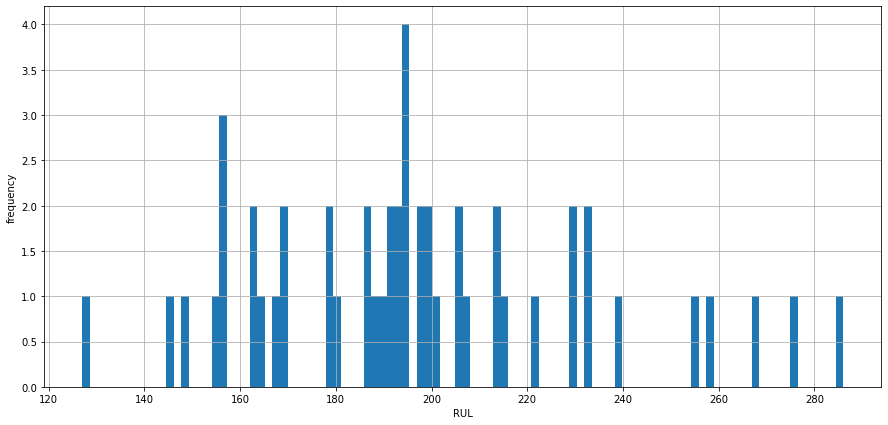

In [6]:
df_max_rul = t[['Engine id', 'RUL']].groupby('Engine id').max().reset_index()
df_max_rul['RUL'].hist(bins=100, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

## the histogram is divided into 100 bins for better understanding of the engine breakdown, the above graph gives details that most of engines peaks at approximately 190 cycles and the data is more of right skewed

In [7]:
t.columns

Index(['Engine id', 'Cycle number', 'Operation Condition 1',
       'Operation Condition 2', 'Operation Condition 3', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'RUL'],
      dtype='object')

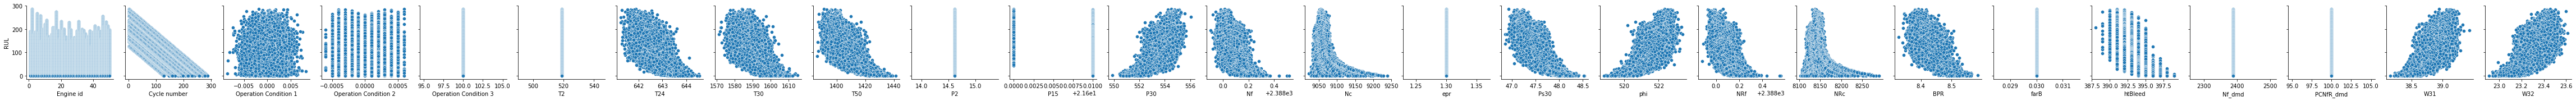

In [8]:
sns.pairplot(t,x_vars=['Engine id', 'Cycle number', 'Operation Condition 1',
       'Operation Condition 2', 'Operation Condition 3', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'],
    y_vars=['RUL'])

## sensors T2, P2, epr, farB, Nf_dmd, PCNfR_dmd gives the same information i.e., a flat line, this gives no information, hence these can be ignored for the prediction of RUL


## sensors T24, T30, T50, Nf, Ps30, NRf, BPR, htBleed, Cycle number shows negative correlation that is decling trend. 

## Sensors P30, phi,W31, W32 shows positive correlation that is rising trend

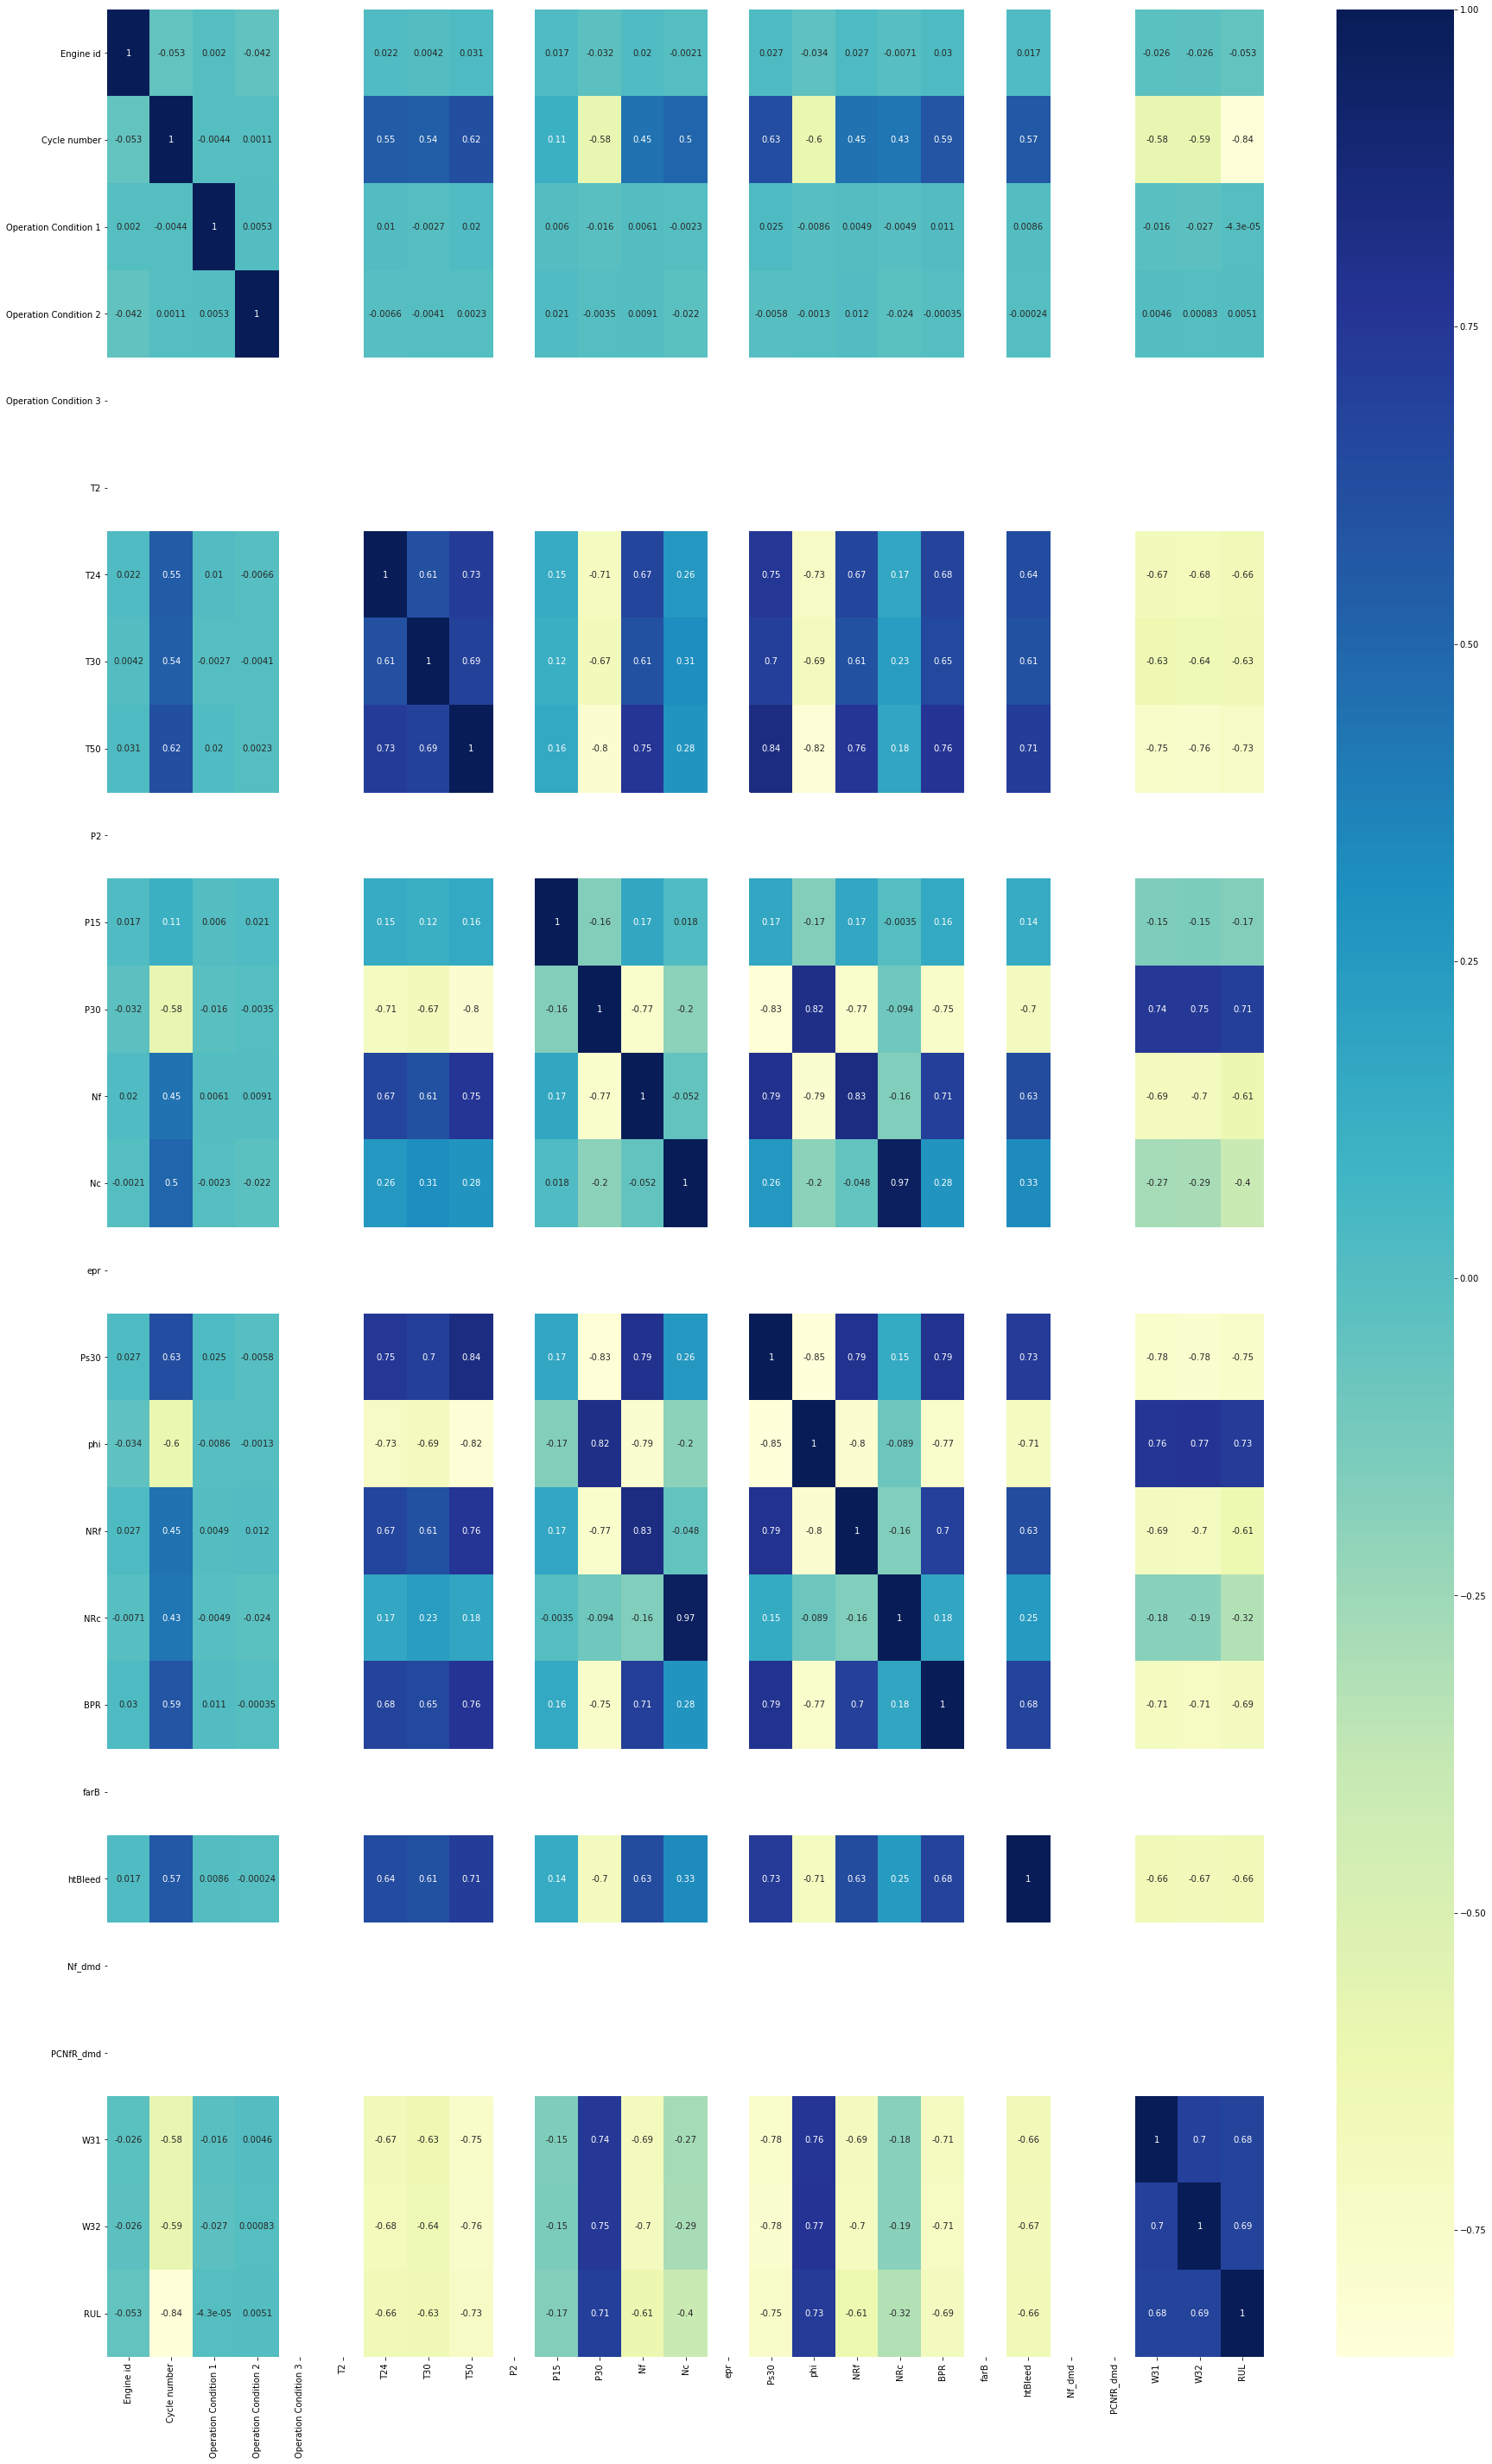

In [9]:
plt.figure(figsize=(30,50))
sns.heatmap(t.corr(), cmap="YlGnBu", annot = True)
plt.show()

## P30, Phi, W31, W32 has the correlation greater than 0.68, everything else are either show negative correlation or no relation at all

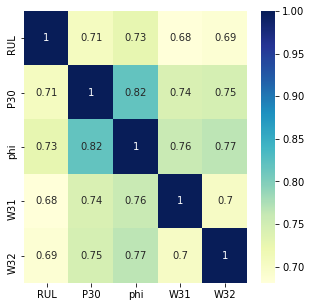

In [10]:
# t[['RUL','P30','phi','W31','W32']]
plt.figure(figsize=(5,5))
sns.heatmap(t[['RUL','P30','phi','W31','W32']].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [31]:
#fitting with the training data in OLS without interactions
X = t[['P30','phi','W31','W32', 'T24', 'T30', 'T50', 'Ps30', 'BPR', 'htBleed','Cycle number']] ##removing features Nf and NRf
X['NfNrf']=t['Nf']*t['NRf']
y = t['RUL']

<ipython-input-31-4911f59f30f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['NfNrf']=t['Nf']*t['NRf']


In [32]:
print(X.columns, y.shape)

Index(['P30', 'phi', 'W31', 'W32', 'T24', 'T30', 'T50', 'Ps30', 'BPR',
       'htBleed', 'Cycle number', 'NfNrf'],
      dtype='object') (9909,)


In [33]:
lr = sm.OLS(y,X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    RUL   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          1.473e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:27:53   Log-Likelihood:                         -46875.
No. Observations:                9909   AIC:                                  9.377e+04
Df Residuals:                    9897   BIC:                                  9.386e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
P30              3.8088      0.623      6.118      0.000       2.588       5.029
phi              6.6219      0.816      8.112      0.000       5.022       8.222
W31             10.6083      2.652      4.000      0.000       5.410      15.807
W32             16.9847      4.472      3.798      0.000       8.219      25.750
T24             -5.0117      0.889     -5.639      0.000      -6.754      -3.270
T30             -0.3089      0.067     -4.580      0.000      -0.441      -0.177
T50             -0.3998      0.065     -6.130      0.000      -0.528      -0.272
Ps30           -21.2824      2.491     -8.543      0.000     -26.166     -16.399
BPR            -66.1579     13.275     -4.984      0.000     -92.180     -40.136
htBleed         -0.8887      0.281     -3.167      0.002      -1.439      -0.339
Cycle number    -0.5546      0.006    -91.911      0.000      -0.566      -0.543
NfNrf        -2.606e-06      0.000     -0.017      0.986      -0.000       0.000
==============================================================================
Omnibus:                      220.723   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.546
Skew:                           0.373   Prob(JB):                     1.17e-51
Kurtosis:                       2.900   Cond. No.                     2.75e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
test=test_data[['P30','phi','W31','W32', 'T24', 'T30', 'T50', 'Ps30', 'BPR', 'htBleed','Cycle number']]
test['NfNrf']=test_data['Nf']*test_data['NRf']

lr.predict(test)

<ipython-input-14-bab332358043>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['NfNrf']=test_data['Nf']*test_data['NRf']


0       181.764623
1       186.851369
2       186.882369
3       196.170491
4       189.152368
           ...    
6407    100.464091
6408     91.195693
6409     94.862329
6410     85.659559
6411     87.274683
Length: 6412, dtype: float64

In [15]:
test_data['predicted_RUL'] =lr.predict(test)
test_data

,Engine id,Cycle number,Operation Condition 1,Operation Condition 2,Operation Condition 3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,predicted_RUL
0,51,1,0.0032,-0.0003,100.0,518.67,641.83,1583.55,1408.68,14.62,...,2387.99,8149.56,8.3884,0.03,391,2388,100.0,39.08,23.3214,181.764623
1,51,2,-0.0011,-0.0002,100.0,518.67,642.09,1580.84,1397.69,14.62,...,2387.98,8145.73,8.3922,0.03,391,2388,100.0,38.83,23.3451,186.851369
2,51,3,0.0008,-0.0004,100.0,518.67,642.49,1591.56,1398.40,14.62,...,2388.00,8142.38,8.4018,0.03,392,2388,100.0,39.18,23.3495,186.882369
3,51,4,-0.0010,-0.0000,100.0,518.67,642.42,1573.22,1397.74,14.62,...,2387.99,8148.23,8.3900,0.03,393,2388,100.0,38.89,23.4847,196.170491
4,51,5,0.0024,0.0003,100.0,518.67,642.08,1587.52,1388.02,14.62,...,2388.02,8147.25,8.4024,0.03,391,2388,100.0,39.05,23.4072,189.152368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,100,116,0.0006,0.0000,100.0,518.67,642.36,1591.22,1407.75,14.62,...,2388.07,8145.15,8.4126,0.03,392,2388,100.0,39.05,23.3016,100.464091
6408,100,117,0.0006,-0.0001,100.0,518.67,642.77,1590.85,1412.00,14.62,...,2388.13,8143.03,8.4345,0.03,394,2388,100.0,38.79,23.3007,91.195693
6409,100,118,0.0018,-0.0002,100.0,518.67,642.21,1586.56,1405.31,14.62,...,2388.09,8139.82,8.4590,0.03,393,2388,100.0,38.81,23.2483,94.862329
6410,100,119,0.0020,-0.0003,100.0,518.67,642.57,1588.46,1405.24,14.62,...,2388.07,8146.76,8.4512,0.03,394,2388,100.0,38.77,23.2437,85.659559


In [16]:
test_data['max']=test_data.groupby(by=['Engine id'])['predicted_RUL'].transform('max')

In [17]:
test_data[['Engine id','max']].drop_duplicates()

,Engine id,max
0,51,199.253662
127,52,170.098944
254,53,180.992220
371,54,196.347504
525,55,174.656971
640,56,166.716270
805,57,182.457061
887,58,183.422100
975,59,205.163040
1113,60,171.076117


In [18]:
#OLS model with positive correlation

X = t[['P30','phi','W31','W32']] ##removing features Nf and NRf
y = t['RUL']
lr = sm.OLS(y,X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    RUL   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                          1.395e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:25:54   Log-Likelihood:                         -52054.
No. Observations:                9909   AIC:                                  1.041e+05
Df Residuals:                    9905   BIC:                                  1.041e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
P30           -4.6238      0.912     -5.070      0.000      -6.412      -2.836
phi          -19.6756      0.944    -20.842      0.000     -21.526     -17.825
W31          161.8448      3.805     42.535      0.000     154.386     169.303
W32          284.9505      6.305     45.191      0.000     272.590     297.311
==============================================================================
Omnibus:                      395.192   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              443.403
Skew:                           0.517   Prob(JB):                     5.20e-97
Kurtosis:                       2.932   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
test=test_data[['P30','phi','W31','W32']]
test_data['predicted_RUL'] =lr.predict(test)
test_data['max']=test_data.groupby(by=['Engine id'])['predicted_RUL'].transform('max')
test_data[['Engine id','max']].drop_duplicates()

,Engine id,max
0,51,198.696357
127,52,184.726513
254,53,169.844761
371,54,211.982329
525,55,203.083634
640,56,153.957873
805,57,173.342879
887,58,187.892434
975,59,216.564348
1113,60,179.637137


In [20]:
## model for negative correlation
X = t[['P30','phi','W31','W32']] ##removing features Nf and NRf
y = t['RUL']
lr = sm.OLS(y,X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    RUL   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                          1.395e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:25:54   Log-Likelihood:                         -52054.
No. Observations:                9909   AIC:                                  1.041e+05
Df Residuals:                    9905   BIC:                                  1.041e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
P30           -4.6238      0.912     -5.070      0.000      -6.412      -2.836
phi          -19.6756      0.944    -20.842      0.000     -21.526     -17.825
W31          161.8448      3.805     42.535      0.000     154.386     169.303
W32          284.9505      6.305     45.191      0.000     272.590     297.311
==============================================================================
Omnibus:                      395.192   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              443.403
Skew:                           0.517   Prob(JB):                     5.20e-97
Kurtosis:                       2.932   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
## training with differnet feature set
X = t[['T24','T30','T50','P30','Ps30','Nf','Nc','NRf','NRc','W31','W32','BPR','htBleed','phi']] ##removing features Nf and NRf
y = t['RUL']
lr = sm.OLS(y,X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    RUL   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              7104.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:25:54   Log-Likelihood:                         -49524.
No. Observations:                9909   AIC:                                  9.908e+04
Df Residuals:                    9895   BIC:                                  9.918e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
T24           -7.0275      1.162     -6.050      0.000      -9.304      -4.751
T30           -0.4354      0.089     -4.897      0.000      -0.610      -0.261
T50           -0.7222      0.085     -8.490      0.000      -0.889      -0.555
P30            6.2514      0.826      7.571      0.000       4.633       7.870
Ps30         -39.2987      3.246    -12.107      0.000     -45.662     -32.936
Nf             7.3400      8.527      0.861      0.389      -9.375      24.056
Nc            -0.3188      0.069     -4.648      0.000      -0.453      -0.184
NRf           -5.8870      8.521     -0.691      0.490     -22.591      10.817
NRc           -0.2152      0.077     -2.785      0.005      -0.367      -0.064
W31           21.1441      3.466      6.100      0.000      14.349      27.939
W32           35.0139      5.855      5.980      0.000      23.537      46.491
BPR         -116.7151     17.352     -6.726      0.000    -150.728     -82.702
htBleed       -1.8555      0.370     -5.009      0.000      -2.582      -1.129
phi           11.4820      1.094     10.491      0.000       9.337      13.627
==============================================================================
Omnibus:                      527.991   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.708
Skew:                           0.609   Prob(JB):                    2.00e-134
Kurtosis:                       3.090   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# using Logistic Regression model

logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X,y)
test=test_data[['T24','T30','T50','P30','Ps30','Nf','Nc','NRf','NRc','W31','W32','BPR','htBleed','phi']]
test_data['predicted_RUL'] = logistic_model.predict(test)
test_data['max']=test_data.groupby(by=['Engine id'])['predicted_RUL'].transform('max')
test_data[['Engine id','max']].drop_duplicates()

,Engine id,max
0,51,264
127,52,187
254,53,172
371,54,264
525,55,172
640,56,168
805,57,255
887,58,172
975,59,245
1113,60,191


In [23]:
#Decision Tree Regression
tm = DecisionTreeRegressor()
tm.fit(X, y)
test=test_data[['T24','T30','T50','P30','Ps30','Nf','Nc','NRf','NRc','W31','W32','BPR','htBleed','phi']]
test_data['predicted_RUL'] = tm.predict(test)
test_data['max']=test_data.groupby(by=['Engine id'])['predicted_RUL'].transform('max')
td=test_data[['Engine id','max']].drop_duplicates()

In [24]:
y_test.head

<bound method NDFrame.head of     Forecast Length  Engine id
0                86         51
1                86         52
2                78         53
3               103         54
4                78         55
5               110         56
6                55         57
7                59         58
8                93         59
9                69         60
10               74         61
11               72         62
12               70         63
13              114         64
14               62         65
15               81         66
16              126         67
17               80         68
18              145         69
19               55         70
20               84         71
21               86         72
22               86         73
23               67         74
24               92         75
25               84         76
26               62         77
27               93         78
28               80         79
29               74         80
30       

In [25]:
print(y_test.head, td.head)

<bound method NDFrame.head of     Forecast Length  Engine id
0                86         51
1                86         52
2                78         53
3               103         54
4                78         55
5               110         56
6                55         57
7                59         58
8                93         59
9                69         60
10               74         61
11               72         62
12               70         63
13              114         64
14               62         65
15               81         66
16              126         67
17               80         68
18              145         69
19               55         70
20               84         71
21               86         72
22               86         73
23               67         74
24               92         75
25               84         76
26               62         77
27               93         78
28               80         79
29               74         80
30       

In [26]:
sklearn.metrics.precision_recall_fscore_support(y_test['Forecast Length'], td['max'])

C:\Users\uttej_aei8x\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\uttej_aei8x\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 2., 1., 4., 1., 1., 1., 1., 2., 3., 1., 2., 3., 2., 2., 6., 1.,
        1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0.

In [27]:
sklearn.metrics.precision_recall_fscore_support(y_test['Engine id'], td['Engine id'])

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1], dtype=int64))